<h1><center>MSIN0166 Data Engineering Individual Assignment</h1>
    <h2><center>Due: 26th April 2022</h2>

# 1.0 Introduction

NBA games would produce many static and dynamic data for each player in every team. How these data can bring more value for both the team and the investment companies would be a good topic for data analysts and big data management to explore. In this project, the players in each team’s roster will be analysed with their current season and career per game result and their corresponding personal information. The data will be gathered from https://www.basketball-reference.com/ and they will be stored in a relational database (PostgreSQL).

In terms of basic game information about the NBA, there are 30 teams playing in NBA games, each team would play 82 games every game season and 8 teams from each conference area would be selected for playoff games. (wiki)

# 2.0 Workflow

This project is designed in a structured sequence of processes and they are processed separately. The first process is to get the team related information then from each team gets the roster players' basic information. Once the player's basic information is gathered, the current season and career results are gathered. When all the data are ready, machine learning classifiers are used for predicting whether a player will be in a playoff or not.

## 2.1 Version Control

Version control is very important for project management for either individual or group projects. Version control is a tool to manage the changes made in the source code for the project over time. By using the version control tools, the team can work more efficiently and more effectively. (version_control) In this project, git is used for tracking the code changes. The code changes are committed and pushed after finishing each day’s work.

Github: https://github.com/Haiyun-Zou/MSIN0166_Data_Engineering_individual 

## 2.2 Data Lineage

"At its most basic it's the history of your data." () Data version control is necessary for data science related projects because data version control can help to understand the previous version of the data which could reduce the experiments required for training and reproduction.() In this project, Data Version Control(DVC) is used for tracking the data version. The pipeline of each stage is written in the *dvc.yaml file*. Where there are five stages: **team, players, ML, data_transformtion, write_into_database**. There is also a file called *params.yaml* where all the parameters used in the ML stage are stored. This is useful because the parameters can be manipulated separately without changing the original machine learning code. DVC is also implmented in the auto script file.

In [348]:
from IPython.display import Image

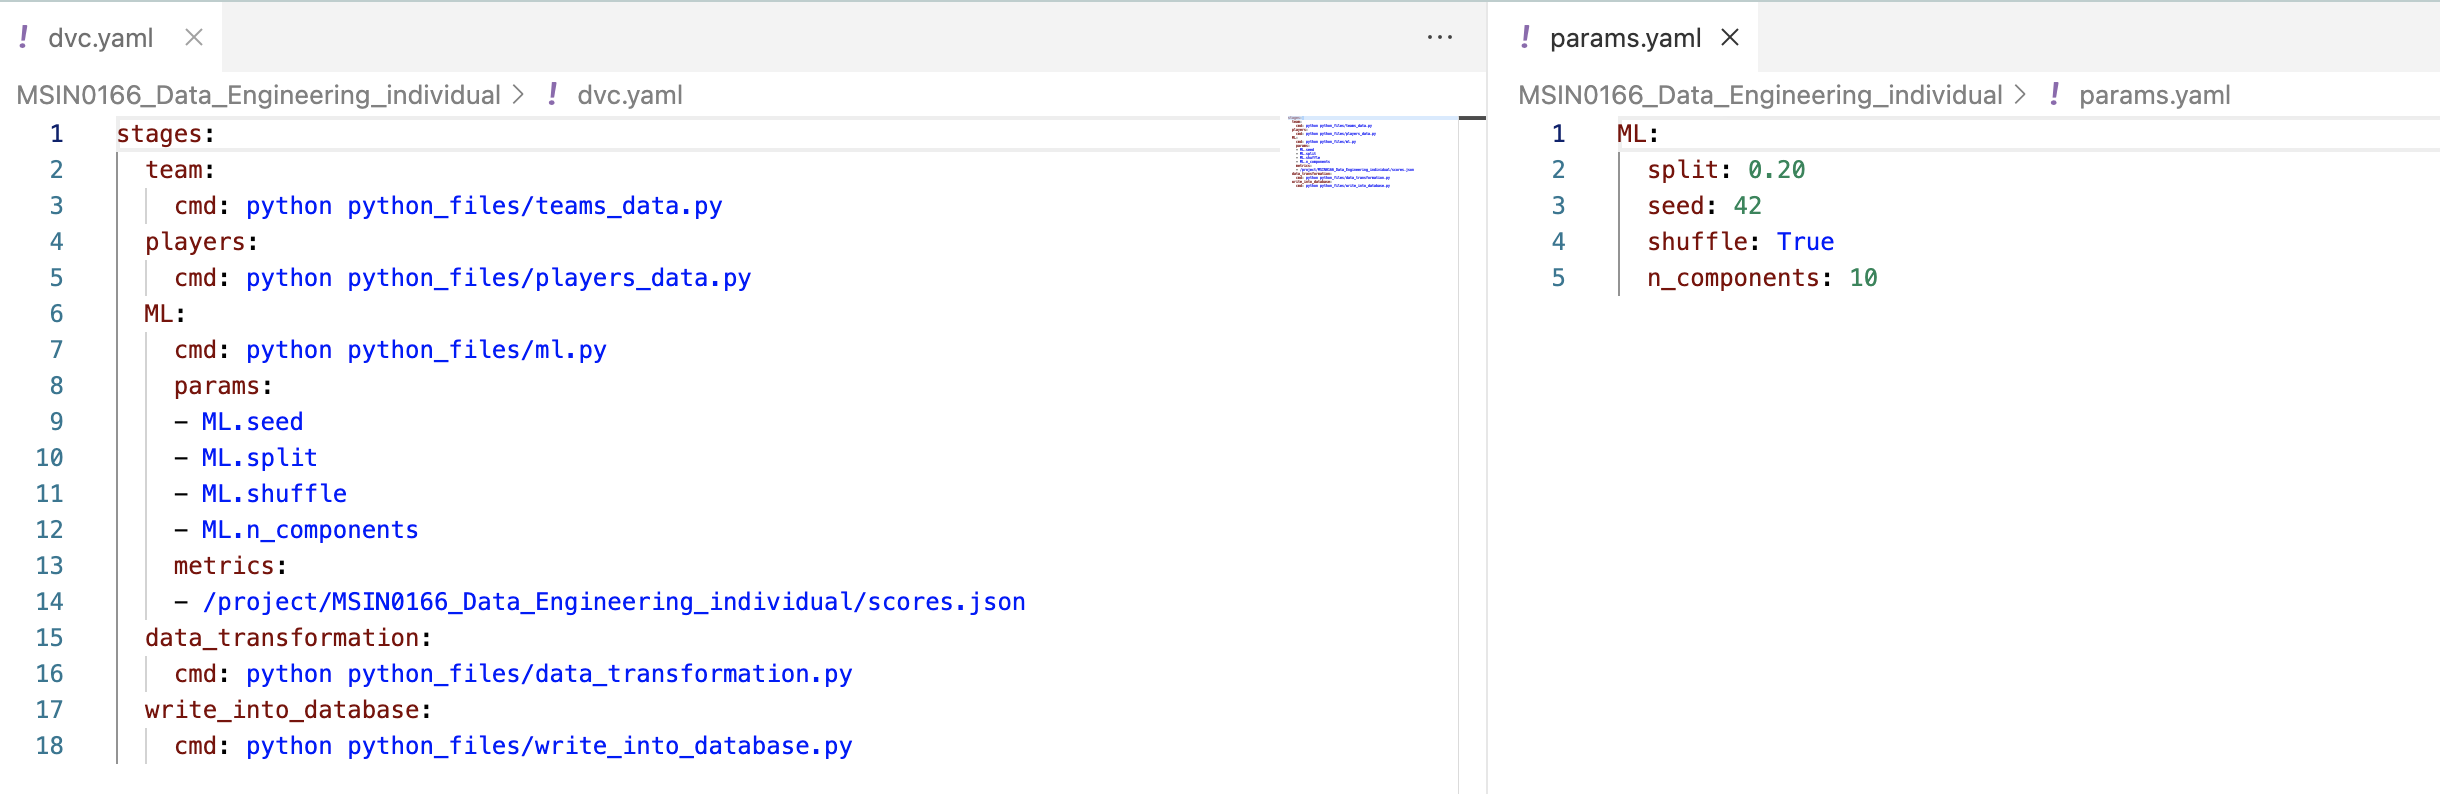

In [352]:
Image("/project/MSIN0166_Data_Engineering_individual/graphs/dvc_files.png", width = 900)

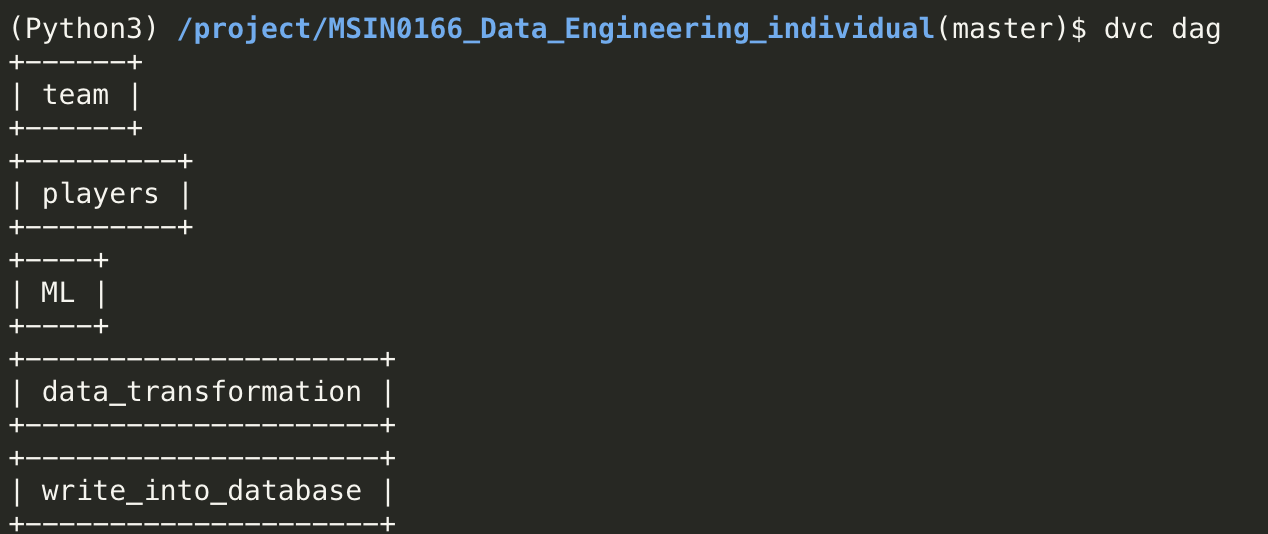

In [349]:
Image("/project/MSIN0166_Data_Engineering_individual/graphs/dvc_dag.png", width = 600)

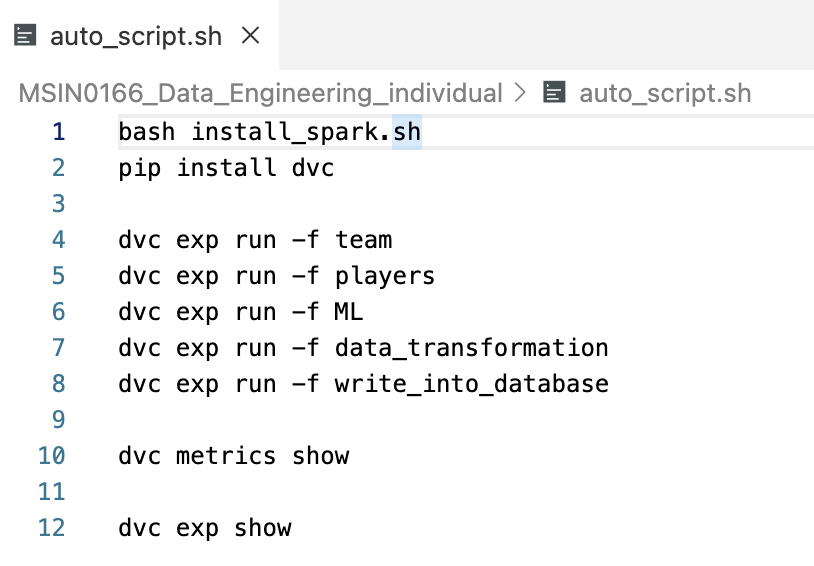

In [355]:
Image("/project/MSIN0166_Data_Engineering_individual/graphs/auto_script.png", width = 400)

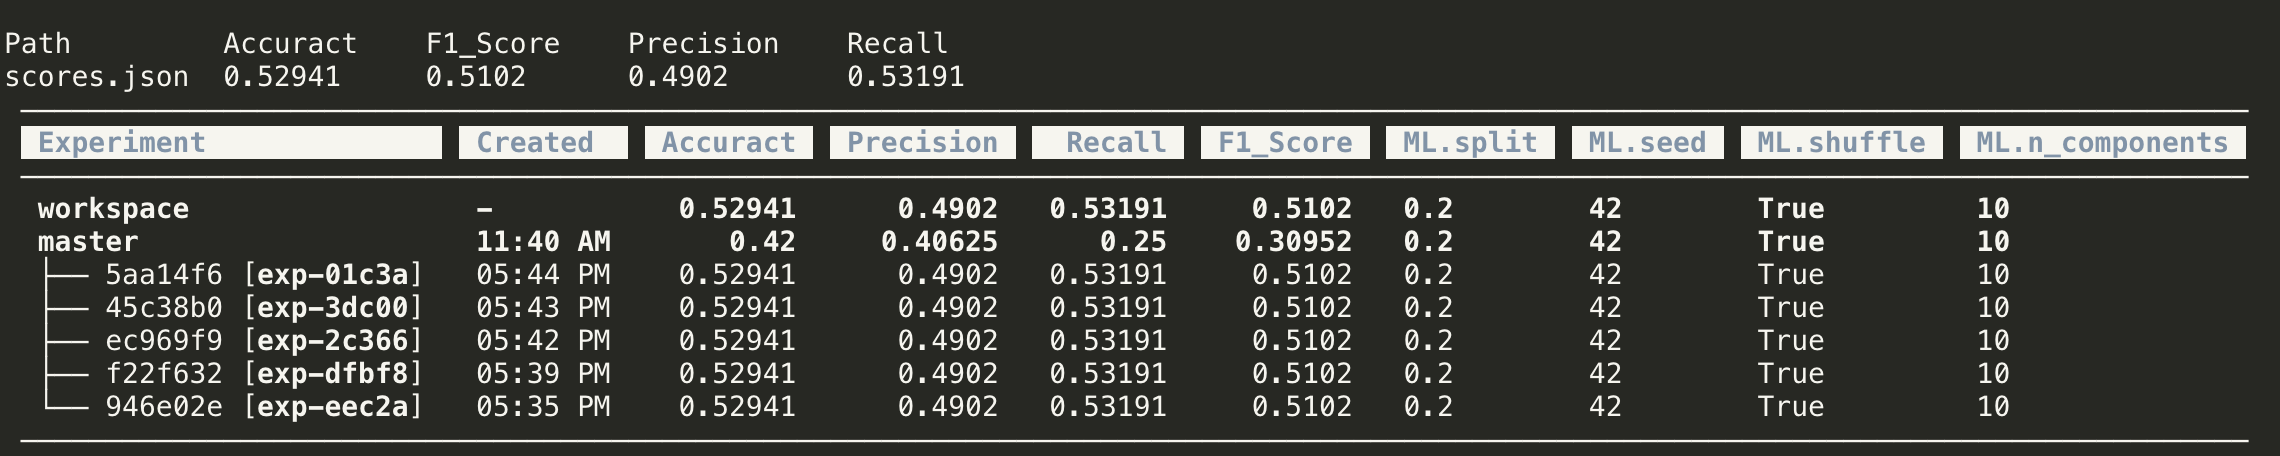

In [343]:
Image("/project/MSIN0166_Data_Engineering_individual/graphs/dvc_show.png", width = 900)

## 2.3 Terraform

## 2.4 Project Management

Trello is used to track everyday progression. The details are shown below.

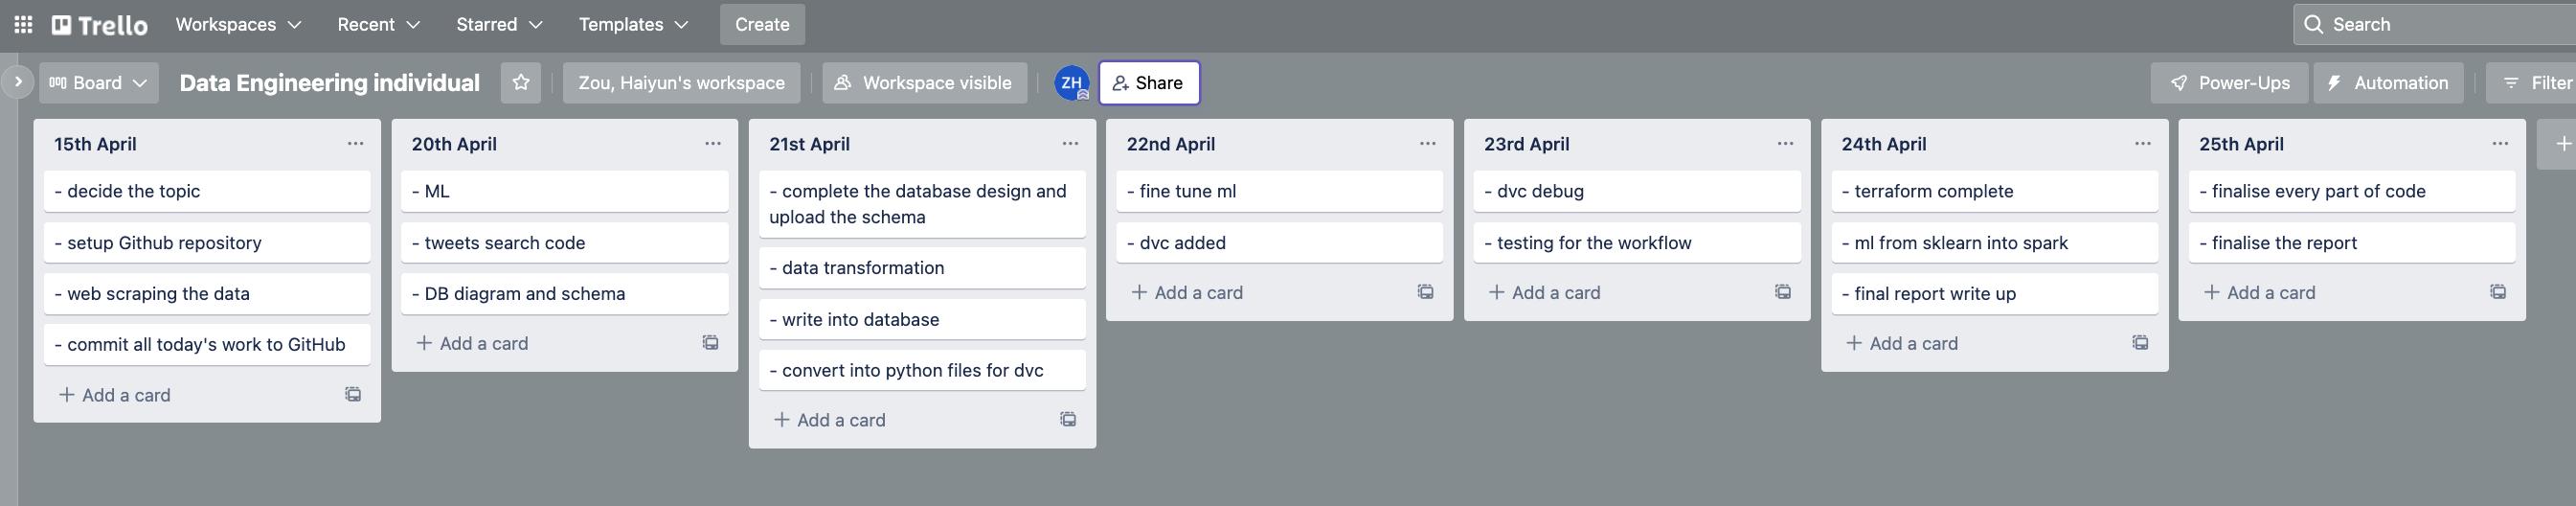

In [339]:
Image("/project/MSIN0166_Data_Engineering_individual/graphs/trello.png", width = 1500)

In [340]:
# import the packages
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import os
import requests
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

In [3]:
# set up the display option
pd.set_option('display.max_columns', None)

In [4]:
# install the spark
!bash install_spark.sh


         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.

Hit:1 http://eu-west-1.ec2.archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://eu-west-1.ec2.archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 http://eu-west-1.ec2.archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:4 https://packages.cloud.google.com/apt cloud-sdk InRelease                
Ge

spark-3.2.1-bin-hadoop3.2/data/mllib/images/partitioned/cls=kittens/date=2018-02/DP153539.jpg
spark-3.2.1-bin-hadoop3.2/data/mllib/images/partitioned/cls=kittens/date=2018-02/DP802813.jpg
spark-3.2.1-bin-hadoop3.2/data/mllib/images/partitioned/cls=multichannel/
spark-3.2.1-bin-hadoop3.2/data/mllib/images/partitioned/cls=multichannel/date=2018-01/
spark-3.2.1-bin-hadoop3.2/data/mllib/images/partitioned/cls=multichannel/date=2018-01/BGRA.png
spark-3.2.1-bin-hadoop3.2/data/mllib/images/partitioned/cls=multichannel/date=2018-01/BGRA_alpha_60.png
spark-3.2.1-bin-hadoop3.2/data/mllib/images/partitioned/cls=multichannel/date=2018-02/
spark-3.2.1-bin-hadoop3.2/data/mllib/images/partitioned/cls=multichannel/date=2018-02/chr30.4.184.jpg
spark-3.2.1-bin-hadoop3.2/data/mllib/images/partitioned/cls=multichannel/date=2018-02/grayscale.jpg
spark-3.2.1-bin-hadoop3.2/data/mllib/iris_libsvm.txt
spark-3.2.1-bin-hadoop3.2/data/mllib/kmeans_data.txt
spark-3.2.1-bin-hadoop3.2/data/mllib/pagerank_data.txt
sp

spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/ml/JavaNormalizerExample.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/ml/JavaOneHotEncoderExample.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/ml/JavaOneVsRestExample.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/ml/JavaPCAExample.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/ml/JavaPipelineExample.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/ml/JavaPolynomialExpansionExample.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/ml/JavaPowerIterationClusteringExample.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/ml/JavaPrefixSpanExample.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/ml/JavaQuantileDiscretizerExample.java
spark-3.2.1-bin-hadoop3.2/exam

spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/sql/streaming/JavaStructuredKerberizedKafkaWordCount.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/sql/streaming/JavaStructuredNetworkWordCount.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/sql/streaming/JavaStructuredNetworkWordCountWindowed.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/sql/streaming/JavaStructuredSessionization.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/streaming/
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/streaming/JavaCustomReceiver.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/streaming/JavaDirectKafkaWordCount.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/org/apache/spark/examples/streaming/JavaDirectKerberizedKafkaWordCount.java
spark-3.2.1-bin-hadoop3.2/examples/src/main/java/or

spark-3.2.1-bin-hadoop3.2/examples/src/main/python/mllib/gaussian_mixture_example.py
spark-3.2.1-bin-hadoop3.2/examples/src/main/python/mllib/gaussian_mixture_model.py
spark-3.2.1-bin-hadoop3.2/examples/src/main/python/mllib/gradient_boosting_classification_example.py
spark-3.2.1-bin-hadoop3.2/examples/src/main/python/mllib/gradient_boosting_regression_example.py
spark-3.2.1-bin-hadoop3.2/examples/src/main/python/mllib/hypothesis_testing_example.py
spark-3.2.1-bin-hadoop3.2/examples/src/main/python/mllib/hypothesis_testing_kolmogorov_smirnov_test_example.py
spark-3.2.1-bin-hadoop3.2/examples/src/main/python/mllib/isotonic_regression_example.py
spark-3.2.1-bin-hadoop3.2/examples/src/main/python/mllib/k_means_example.py
spark-3.2.1-bin-hadoop3.2/examples/src/main/python/mllib/kernel_density_estimation_example.py
spark-3.2.1-bin-hadoop3.2/examples/src/main/python/mllib/kmeans.py
spark-3.2.1-bin-hadoop3.2/examples/src/main/python/mllib/latent_dirichlet_allocation_example.py
spark-3.2.1-bin

spark-3.2.1-bin-hadoop3.2/examples/src/main/resources/users.orc
spark-3.2.1-bin-hadoop3.2/examples/src/main/resources/users.parquet
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/AccumulatorMetricsTest.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/BroadcastTest.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/DFSReadWriteTest.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/DriverSubmissionTest.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/ExceptionHandlingTest.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scal

spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/ml/LogisticRegressionSummaryExample.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/ml/LogisticRegressionWithElasticNetExample.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/ml/MaxAbsScalerExample.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/ml/MinHashLSHExample.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/ml/MinMaxScalerExample.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/ml/ModelSelectionViaCrossValidationExample.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/ml/ModelSelectionViaTrainValidationSplitExample.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/ml/MulticlassLogisticRegressionWithElasticNetExample.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/

spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/mllib/PCAOnRowMatrixExample.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/mllib/PCAOnSourceVectorExample.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/mllib/PMMLModelExportExample.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/mllib/PowerIterationClusteringExample.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/mllib/PrefixSpanExample.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/mllib/RandomForestClassificationExample.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/mllib/RandomForestRegressionExample.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/mllib/RandomRDDGeneration.scala
spark-3.2.1-bin-hadoop3.2/examples/src/main/scala/org/apache/spark/examples/mllib/RankingMet

spark-3.2.1-bin-hadoop3.2/jars/bonecp-0.8.0.RELEASE.jar
spark-3.2.1-bin-hadoop3.2/jars/breeze-macros_2.12-1.2.jar
spark-3.2.1-bin-hadoop3.2/jars/breeze_2.12-1.2.jar
spark-3.2.1-bin-hadoop3.2/jars/cats-kernel_2.12-2.1.1.jar
spark-3.2.1-bin-hadoop3.2/jars/chill-java-0.10.0.jar
spark-3.2.1-bin-hadoop3.2/jars/chill_2.12-0.10.0.jar
spark-3.2.1-bin-hadoop3.2/jars/commons-cli-1.2.jar
spark-3.2.1-bin-hadoop3.2/jars/commons-codec-1.15.jar
spark-3.2.1-bin-hadoop3.2/jars/commons-collections-3.2.2.jar
spark-3.2.1-bin-hadoop3.2/jars/commons-compiler-3.0.16.jar
spark-3.2.1-bin-hadoop3.2/jars/commons-compress-1.21.jar
spark-3.2.1-bin-hadoop3.2/jars/commons-crypto-1.1.0.jar
spark-3.2.1-bin-hadoop3.2/jars/commons-dbcp-1.4.jar
spark-3.2.1-bin-hadoop3.2/jars/commons-io-2.8.0.jar
spark-3.2.1-bin-hadoop3.2/jars/commons-lang-2.6.jar
spark-3.2.1-bin-hadoop3.2/jars/commons-lang3-3.12.0.jar
spark-3.2.1-bin-hadoop3.2/jars/commons-logging-1.1.3.jar
spark-3.2.1-bin-hadoop3.2/jars/commons-math3-3.4.1.jar
spark-3.2

spark-3.2.1-bin-hadoop3.2/jars/opencsv-2.3.jar
spark-3.2.1-bin-hadoop3.2/jars/orc-core-1.6.12.jar
spark-3.2.1-bin-hadoop3.2/jars/orc-mapreduce-1.6.12.jar
spark-3.2.1-bin-hadoop3.2/jars/orc-shims-1.6.12.jar
spark-3.2.1-bin-hadoop3.2/jars/oro-2.0.8.jar
spark-3.2.1-bin-hadoop3.2/jars/osgi-resource-locator-1.0.3.jar
spark-3.2.1-bin-hadoop3.2/jars/paranamer-2.8.jar
spark-3.2.1-bin-hadoop3.2/jars/parquet-column-1.12.2.jar
spark-3.2.1-bin-hadoop3.2/jars/parquet-common-1.12.2.jar
spark-3.2.1-bin-hadoop3.2/jars/parquet-encoding-1.12.2.jar
spark-3.2.1-bin-hadoop3.2/jars/parquet-format-structures-1.12.2.jar
spark-3.2.1-bin-hadoop3.2/jars/parquet-hadoop-1.12.2.jar
spark-3.2.1-bin-hadoop3.2/jars/parquet-jackson-1.12.2.jar
spark-3.2.1-bin-hadoop3.2/jars/protobuf-java-2.5.0.jar
spark-3.2.1-bin-hadoop3.2/jars/py4j-0.10.9.3.jar
spark-3.2.1-bin-hadoop3.2/jars/pyrolite-4.30.jar
spark-3.2.1-bin-hadoop3.2/jars/rocksdbjni-6.20.3.jar
spark-3.2.1-bin-hadoop3.2/jars/scala-collection-compat_2.12-2.1.1.jar
spark

spark-3.2.1-bin-hadoop3.2/licenses/LICENSE-zstd-jni.txt
spark-3.2.1-bin-hadoop3.2/licenses/LICENSE-zstd.txt
spark-3.2.1-bin-hadoop3.2/python/
spark-3.2.1-bin-hadoop3.2/python/.coveragerc
spark-3.2.1-bin-hadoop3.2/python/.gitignore
spark-3.2.1-bin-hadoop3.2/python/MANIFEST.in
spark-3.2.1-bin-hadoop3.2/python/README.md
spark-3.2.1-bin-hadoop3.2/python/dist/
spark-3.2.1-bin-hadoop3.2/python/docs/
spark-3.2.1-bin-hadoop3.2/python/docs/Makefile
spark-3.2.1-bin-hadoop3.2/python/docs/make.bat
spark-3.2.1-bin-hadoop3.2/python/docs/make2.bat
spark-3.2.1-bin-hadoop3.2/python/docs/source/
spark-3.2.1-bin-hadoop3.2/python/docs/source/_static/
spark-3.2.1-bin-hadoop3.2/python/docs/source/_static/copybutton.js
spark-3.2.1-bin-hadoop3.2/python/docs/source/_static/css/
spark-3.2.1-bin-hadoop3.2/python/docs/source/_static/css/pyspark.css
spark-3.2.1-bin-hadoop3.2/python/docs/source/_templates/
spark-3.2.1-bin-hadoop3.2/python/docs/source/_templates/autosummary/
spark-3.2.1-bin-hadoop3.2/python/docs/sou

spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/feature.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/feature.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/fpm.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/fpm.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/functions.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/functions.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/image.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/image.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/linalg/
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/linalg/__init__.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/linalg/__init__.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/param/
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/param/__init__.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/param/__init__.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/param/_shared_params_code_gen.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/param/_shared_params_code_gen.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/ml/param/shar

spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/internal.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/missing/
spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/missing/__init__.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/missing/common.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/missing/frame.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/missing/groupby.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/missing/indexes.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/missing/series.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/missing/window.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/ml.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/mlflow.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/namespace.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/numpy_compat.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/plot/
spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/plot/__init__.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/pandas/plot/core.py
s

spark-3.2.1-bin-hadoop3.2/python/pyspark/resultiterable.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/serializers.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/shell.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/shuffle.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/__init__.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/__init__.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/_typing.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/avro/
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/avro/__init__.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/avro/functions.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/avro/functions.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/catalog.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/catalog.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/column.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/column.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/conf.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/co

spark-3.2.1-bin-hadoop3.2/python/pyspark/tests/test_serializers.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/tests/test_shuffle.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/tests/test_taskcontext.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/tests/test_util.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/tests/test_worker.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/traceback_utils.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/util.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/util.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/version.py
spark-3.2.1-bin-hadoop3.2/python/pyspark/version.pyi
spark-3.2.1-bin-hadoop3.2/python/pyspark/worker.py
spark-3.2.1-bin-hadoop3.2/python/pyspark.egg-info/
spark-3.2.1-bin-hadoop3.2/python/pyspark.egg-info/PKG-INFO
spark-3.2.1-bin-hadoop3.2/python/pyspark.egg-info/SOURCES.txt
spark-3.2.1-bin-hadoop3.2/python/pyspark.egg-info/dependency_links.txt
spark-3.2.1-bin-hadoop3.2/python/pyspark.egg-info/requires.txt
spark-3.2.1-bin-hadoop3.2/python/pyspark.egg-info/top_level.

In [4]:
# set up the spark envrionment
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/project/spark-3.2.1-bin-hadoop3.2"

In [5]:
# import spark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("PySpark App").config("spark.jars", "postgresql-42.3.2.jar").getOrCreate()
spark.conf.set("spark.sql.parquet.enableVectorizedReader","false")

# 3.0 Data Mining

## 3.1 Team Data

Firstly, the team's basic information is gathered by using BeautifulSoup from https://www.basketball-reference.com/ . The information on winning and losing is in the same line with the team link and team full name for each team. The line of information is further processed to get the corresponding information and form it in a dictionary.

Secondly, the playoff team information is gathered from https://www.basketball-reference.com/playoffs/NBA_2022.html . Where only the teams in the playoff are listed.

Finally, form the team's basic information into a data frame and merge the playoff data for each team into the data frame. The data frame will be converted into a spark data frame and the schema is printed to check the data type for each column. Finally, the spark data frame is output as a parquet file.

In [44]:
# using BeautifulSoup to get the web page information
URL ="https://www.basketball-reference.com/"
page = requests.get(URL)
soup = BeautifulSoup(page.content, "html.parser")
soup_body = str(soup.body)

In [45]:
# get all the team related data
list_info = re.findall(r'data-stat="payroll_text">(.*)</td></tr>', soup_body)

In [46]:
list_info

['<a href="/contracts/MIA.html" title="Miami Heat Team Payroll">$</a></td><td class="right" data-stat="wins">53</td><td class="right" data-stat="losses">29',
 '<a href="/contracts/BOS.html" title="Boston Celtics Team Payroll">$</a></td><td class="right" data-stat="wins">51</td><td class="right" data-stat="losses">31',
 '<a href="/contracts/MIL.html" title="Milwaukee Bucks Team Payroll">$</a></td><td class="right" data-stat="wins">51</td><td class="right" data-stat="losses">31',
 '<a href="/contracts/PHI.html" title="Philadelphia 76ers Team Payroll">$</a></td><td class="right" data-stat="wins">51</td><td class="right" data-stat="losses">31',
 '<a href="/contracts/TOR.html" title="Toronto Raptors Team Payroll">$</a></td><td class="right" data-stat="wins">48</td><td class="right" data-stat="losses">34',
 '<a href="/contracts/CHI.html" title="Chicago Bulls Team Payroll">$</a></td><td class="right" data-stat="wins">46</td><td class="right" data-stat="losses">36',
 '<a href="/contracts/BRK.h

In [47]:
# set the team code and their full name into a dictionary
dict_info = {i[20:23]:[re.findall(r'title="(.*) Team Payroll', i)[0], int(re.findall(r'data-stat="wins">(.*)</', i)[0]), int(re.findall(r'data-stat="losses">(.*)', i)[0])] for i in list_info}

In [48]:
# check the playoff data
URL ="https://www.basketball-reference.com/playoffs/NBA_2022.html"
page = requests.get(URL)
soup = BeautifulSoup(page.content, "html.parser")
soup_body = str(soup.body)

In [49]:
# get the playoff team name
list_playoff = list(set([i.split("html'>")[1] for i in re.findall(r'data-stat="team" >(.*?)</a></td><td', soup_body)]))

In [50]:
list_playoff

['Phoenix Suns',
 'Toronto Raptors',
 'Chicago Bulls',
 'Minnesota Timberwolves',
 'New Orleans Pelicans',
 'Golden State Warriors',
 'Boston Celtics',
 'Philadelphia 76ers',
 'Miami Heat',
 'Atlanta Hawks',
 'Dallas Mavericks',
 'Memphis Grizzlies',
 'Denver Nuggets',
 'Utah Jazz',
 'Milwaukee Bucks',
 'Brooklyn Nets']

In [51]:
# convert the team data into a data frame
team_df = pd.DataFrame({'team': dict_info.keys(), 'name': [i[0] for i in dict_info.values()], 'win': [int(i[1]) for i in dict_info.values()], 'loss': [int(i[2]) for i in dict_info.values()]})

In [52]:
# match all the playoff information with the data frame
list_in_playoff = [1 if i in list_playoff else 0 for i in team_df.name]

In [53]:
# add the column of  in_playoff into the data frame for team information
team_df['in_playoff'] = list_in_playoff

In [54]:
# convert the team information into spark data frame
df_team = spark.createDataFrame(team_df)

In [55]:
# show the schema of the data frame
df_team.printSchema()

root
 |-- team: string (nullable = true)
 |-- name: string (nullable = true)
 |-- win: long (nullable = true)
 |-- loss: long (nullable = true)
 |-- in_playoff: long (nullable = true)



In [56]:
# convert the data frame into parquet format
df_team.write.parquet("/project/MSIN0166_Data_Engineering_individual/parquet_files/team.parquet", mode = 'overwrite')

## 3.2 Players Data

Firstly, load the team information data frame to get the initials for each team.

Secondly, the new data frame for each players is created with the columns of 'team', 'playoff', 'name', 'link', 'No.', 'pos', 'height', 'weight', 'birth', 'age', 'exp', 'is_eastern'. Looping through each team page to get the basic information for each player.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky">Column Name</th>
    <th class="tg-0pky">Description</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0lax">team</td>
    <td class="tg-0lax">The team the player belongs to</td>
  </tr>
  <tr>
    <td class="tg-0lax">playoff</td>
    <td class="tg-0lax">Whether this player is in a playoff team</td>
  </tr>
  <tr>
    <td class="tg-0pky">name</td>
    <td class="tg-0pky">The name for each player</td>
  </tr>
  <tr>
    <td class="tg-0pky">link</td>
    <td class="tg-0pky">The unique link for each player</td>
  </tr>
  <tr>
    <td class="tg-0pky">No.</td>
    <td class="tg-0pky">The players number</td>
  </tr>
  <tr>
    <td class="tg-0pky">pos</td>
    <td class="tg-0pky">The position the player is at in each team</td>
  </tr>
  <tr>
    <td class="tg-0pky">height</td>
    <td class="tg-0pky">The height for each player</td>
  </tr>
  <tr>
    <td class="tg-0pky">weight</td>
    <td class="tg-0pky"><span style="font-weight:400;font-style:normal">The weight for each player</span></td>
  </tr>
  <tr>
    <td class="tg-0lax">birth</td>
    <td class="tg-0lax">The year of birth for each player</td>
  </tr>
  <tr>
    <td class="tg-0lax">age</td>
    <td class="tg-0lax">The age of each player</td>
  </tr>
  <tr>
    <td class="tg-0lax">exp</td>
    <td class="tg-0lax">The year of experience for each player</td>
  </tr>
  <tr>
    <td class="tg-0lax">is_eastern</td>
    <td class="tg-0lax">Whether this player is in a team in the eastern conference</td>
  </tr>
</tbody>
</table>

Thirdly, after all the player's links are taken from the team page, the complete version of their current season and career result are gathered using regular expressions. The team's contract link is used for getting the guaranteed data for each player. All the NaN are filled after this section of process.

In [57]:
# read the parquet file for team df
team_df = spark.read.parquet("/project/MSIN0166_Data_Engineering_individual/parquet_files/team.parquet").toPandas()

In [58]:
# create a data frame to store each player's information
players = pd.DataFrame(columns = ['team', 'playoff', 'name', 'link', 'No.', 'pos', 'height', 'weight', 'birth', 'age', 'exp', 'is_eastern'])

In [59]:
players

,team,playoff,name,link,No.,pos,height,weight,birth,age,exp,is_eastern


In [60]:
# loop through each team page and get all the players in each team and their related information
for t in team_df.team:
    URL =f"https://www.basketball-reference.com/teams/{t}/2022.html"
    page = requests.get(URL)
    soup = BeautifulSoup(page.content, "html.parser")
    soup_body = str(soup.body)
    
    no = [i for i in re.findall(r'data-stat="number" scope="row">(.*)</th>', soup_body)]
    link_name = [i.split('</a>')[0].split('">') for i in re.findall(r'"><a href="(.*?)data-stat="pos"', soup_body)]
    pos = re.findall(r'data-stat="pos">(.*?)</td>', soup_body)
    height = [float(i.replace('-', '.')) for i in re.findall(r'data-stat="height">(.*?)</td>', soup_body)]
    weight = [int(i) for i in re.findall(r'data-stat="weight">(.*?)</td>', soup_body)]
    birth = re.findall(r'</td><td class="left" csk="(.*)" data-stat="birth_date">', soup_body)
    exp = re.findall(r'data-stat="years_experience">(.*)</td><td class', soup_body)
    list_team = [t for i in range(len(no))]
    playoff = team_df[team_df['team'] == t]['in_playoff'].values[0]
    list_playoff_t = [int(playoff) for i in range(len(no))]
    is_eastern = [1 if 'Eastern' in re.findall(r'>NBA</a> \n(.*)\n', soup_body)[0] else 0 for i in range(len(no))]
    
    players = players.append(pd.DataFrame({'team': list_team,'playoff': list_playoff_t, 'name': [i[1] for i in link_name], 'link': [i[0] for i in link_name], 'No.': no, 'pos': pos, 'height': height, 'weight': weight, 'birth':[int(i[:4]) for i in birth], 'exp': exp, 'is_eastern':is_eastern})).reset_index(drop=True)

In [61]:
# convert the experience information with 'R' to 0.5 and convert the data type into float64
players['exp'] = players['exp'].replace('R', 0.5)
players['exp'] = players['exp'].astype(np.float64)

In [62]:
# temporary lists for all the players' information
temp_in_season = []
temp_list_2122 = []
temp_list_career = []
# loop through each player's page and get their game information
for count,l in enumerate(players.link):
    URL =f"https://www.basketball-reference.com{l}"
    page = requests.get(URL)

    soup = BeautifulSoup(page.content, "html.parser")
    soup_body = str(soup.body)
    
    
    temp_in_season.append('gamelog/2022' in soup_body)
    temp_list_2122.append(re.findall(fr'{l[1:-5]}/gamelog/2022">(.*?)</td></tr> ', soup_body))
    temp_list_career.append(re.findall(r'</tbody><tfoot><tr><th class="left" data-stat="season" scope="row">Career(.*?)</td></tr>', soup_body))
# add the columns into the players data frame
players['in_2021_22_season'] = temp_in_season
players['2021_2022_season'] = temp_list_2122
players['career'] = temp_list_career

In [63]:
temp_dict = {}
# loop through the teams and get each player's guarantee
for t in team_df.team:
    
    URL =f"https://www.basketball-reference.com/contracts/{t}.html"
    page = requests.get(URL)
    soup = BeautifulSoup(page.content, "html.parser")
    soup_body = str(soup.body)
    for i in re.findall(r'data-stat="player"(.*)</td></tr>', soup_body):
        if '.html">' in i and 'scope="row"><em>' not in i:
            temp_dict[re.findall(r'html">(.*)</a>', i)[0]] = re.findall(r'data-stat="remain_gtd">\$(.*)', i)
players = players.merge(pd.DataFrame({'name': temp_dict.keys(), 'guaranteed': temp_dict.values()}), how = 'left', on = 'name')

In [64]:
# fill all na
players = players.replace((np.inf, -np.inf, np.nan), '0').reset_index(drop = True)

In [65]:
# convert the list into int
players['guaranteed'] = players['guaranteed'].apply(lambda x: int(x[0].replace(',','')) if len(x)>0 else 0)

In [66]:
# get the age of each player by 2022-birth year
players['age'] = players['birth'].apply(lambda x: 2022 - int(x))

In [67]:
# fill the empty information 
players['2021_2022_season'] = players['2021_2022_season'].apply(lambda x: x[0] if len(x) > 0 else '0')
players['career'] = players['career'].apply(lambda x: x[0] if len(x) > 0 else '0')

In [68]:
players

,team,playoff,name,link,No.,pos,height,weight,birth,age,exp,is_eastern,in_2021_22_season,2021_2022_season,career,guaranteed
0,MIN,1,Malik Beasley,/players/b/beaslma01.html,5,SG,6.40,187,1996,26,5.0,0,True,"2021-22</a></th><td class=""center"" data-stat=""...","</th><td class=""center iz"" data-stat=""age""></t...",29849999
1,MIN,1,Naz Reid,/players/r/reidna01.html,11,C,6.90,264,1999,23,2.0,0,True,"2021-22</a></th><td class=""center"" data-stat=""...","</th><td class=""center iz"" data-stat=""age""></t...",0
2,MIN,1,Karl-Anthony Towns,/players/t/townska01.html,32,C,6.11,248,1995,27,6.0,0,True,"2021-22</a><span class=""sr_star""></span></th><...","</th><td class=""center iz"" data-stat=""age""></t...",101370000
3,MIN,1,Jarred Vanderbilt,/players/v/vandeja01.html,8,PF,6.90,214,1999,23,3.0,0,True,"2021-22</a></th><td class=""center"" data-stat=""...","</th><td class=""center iz"" data-stat=""age""></t...",13800000
4,MIN,1,Anthony Edwards,/players/e/edwaran01.html,1,SG,6.40,225,2001,21,1.0,0,True,"2021-22</a></th><td class=""center"" data-stat=""...","</th><td class=""center iz"" data-stat=""age""></t...",20978880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,DEN,1,DeMarcus Cousins,/players/c/couside01.html,4,C,6.10,270,1990,32,10.0,0,True,"2021-22</a></th><td class=""center"" data-stat=""...","</th><td class=""center iz"" data-stat=""age""></t...",1138659
504,DEN,1,Markus Howard,/players/h/howarma02.html,00,SG,5.10,175,1999,23,1.0,0,True,"2021-22</a></th><td class=""center"" data-stat=""...","</th><td class=""center iz"" data-stat=""age""></t...",0
505,DEN,1,Vlatko Čančar,/players/c/cancavl01.html,31,PF,6.80,236,1997,25,2.0,0,True,"2021-22</a></th><td class=""center"" data-stat=""...","</th><td class=""center iz"" data-stat=""age""></t...",0
506,DEN,1,Michael Porter Jr.,/players/p/portemi01.html,1,SF,6.10,218,1998,24,2.0,0,True,"2021-22</a></th><td class=""center"" data-stat=""...","</th><td class=""center iz"" data-stat=""age""></t...",150538735


Finally, the function *get_info* is written to return the specific score with its own pattern, therefore, it can be called straight away instead of writing repeated code several times.

There are 16 columns of data selected for both the current season and the career scores from the original data source.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0lax{text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0lax">Score type</th>
    <th class="tg-0lax">Description</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">G</td>
    <td class="tg-0pky">Games</td>
  </tr>
  <tr>
    <td class="tg-0pky">GS</td>
    <td class="tg-0pky">Game Started</td>
  </tr>
  <tr>
    <td class="tg-0pky">MP</td>
    <td class="tg-0pky">Minutes Played Per Game</td>
  </tr>
  <tr>
    <td class="tg-0pky">FG%</td>
    <td class="tg-0pky">Field Goals Percent</td>
  </tr>
  <tr>
    <td class="tg-0pky">3P%</td>
    <td class="tg-0pky">3 Points Percent</td>
  </tr>
  <tr>
    <td class="tg-0pky">2P%</td>
    <td class="tg-0pky">2 Points Percent</td>
  </tr>
  <tr>
    <td class="tg-0pky">eFG%</td>
    <td class="tg-0pky">Effective Field Goal Percent</td>
  </tr>
  <tr>
    <td class="tg-0pky">FT%</td>
    <td class="tg-0pky">Free Through Percent</td>
  </tr>
  <tr>
    <td class="tg-0pky">ORB</td>
    <td class="tg-0pky">Offensive Rebounds Per Game</td>
  </tr>
  <tr>
    <td class="tg-0pky">DRB</td>
    <td class="tg-0pky">Defensive Rebounds Per Game</td>
  </tr>
  <tr>
    <td class="tg-0pky">AST</td>
    <td class="tg-0pky">Assists Per Game</td>
  </tr>
  <tr>
    <td class="tg-0pky">STL</td>
    <td class="tg-0pky">Steals Per Game</td>
  </tr>
  <tr>
    <td class="tg-0pky">BLK</td>
    <td class="tg-0pky">Blocks Per Game</td>
  </tr>
  <tr>
    <td class="tg-0lax">TOV</td>
    <td class="tg-0lax">Turnovers Per Game</td>
  </tr>
  <tr>
    <td class="tg-0lax">PF</td>
    <td class="tg-0lax">Personal Fouls Per Game</td>
  </tr>
  <tr>
    <td class="tg-0lax">PTS</td>
    <td class="tg-0lax">Points Per Game</td>
  </tr>
</tbody>
</table>

Each of the scores in the above table is generated by calling the get_info function for both the 2021-2022 season and the player's career results. The columns with the original information are dropped and the final data frame is converted into a spark data frame for checking the data type and it is converted into parquet files for further uses.

In [69]:
def get_info(pattern, list_info):
    '''
    function to get information for different attributes
    '''
    temp_list = []
    for count, i in enumerate(list_info):
        if i!='0':
            result = re.findall(pattern, i)[0]
            if 'strong' in result:
                result = result.replace('strong','').replace('/','').replace('<','').replace('>','')
            if result == '':
                result = 0
            
            temp_list.append(result)
        else:
            temp_list.append(0)
    return temp_list

In [70]:
# create new columns and get the corresponding information and convert the data type
players['G_2122'] = get_info((r'data-stat="g">(.*?)</td'), players['2021_2022_season'])
players['G_2122'] = players['G_2122'].astype(np.int64)
players['GS_2122'] = get_info((r'data-stat="gs">(.*?)</td'), players['2021_2022_season'])
players['GS_2122'] = players['GS_2122'].astype(np.int64)
players['MP_2122'] = get_info((r'data-stat="mp_per_g">(.*?)</td'), players['2021_2022_season'])
players['MP_2122'] = players['MP_2122'].astype(np.float64)
players['FG%_2122'] = get_info((r'data-stat="fg_pct">(.*?)</td'), players['2021_2022_season'])
players['FG%_2122'] = players['FG%_2122'].astype(np.float64)
players['3P%_2122'] = get_info((r'data-stat="fg3_pct">(.*?)</td'), players['2021_2022_season'])
players['3P%_2122'] = players['3P%_2122'].astype(np.float64)
players['2P%_2122'] = get_info((r'data-stat="fg2_pct">(.*?)</td'), players['2021_2022_season'])
players['2P%_2122'] = players['2P%_2122'].astype(np.float64)
players['eFG%_2122'] = get_info((r'data-stat="efg_pct">(.*?)</td'), players['2021_2022_season'])
players['eFG%_2122'] = players['eFG%_2122'].astype(np.float64)
players['FT%_2122'] = get_info((r'data-stat="ft_pct">(.*?)</td'), players['2021_2022_season'])
players['FT%_2122'] = players['FT%_2122'].astype(np.float64)
players['ORB_2122'] = get_info((r'data-stat="orb_per_g">(.*?)</td'), players['2021_2022_season'])
players['ORB_2122'] = players['ORB_2122'].astype(np.float64)
players['DRB_2122'] = get_info((r'data-stat="drb_per_g">(.*?)</td'), players['2021_2022_season'])
players['DRB_2122'] = players['DRB_2122'].astype(np.float64)
players['AST_2122'] = get_info((r'data-stat="ast_per_g">(.*?)</td'), players['2021_2022_season'])
players['AST_2122'] = players['AST_2122'].astype(np.float64)
players['STL_2122'] = get_info((r'data-stat="stl_per_g">(.*?)</td'), players['2021_2022_season'])
players['STL_2122'] = players['STL_2122'].astype(np.float64)
players['BLK_2122'] = get_info((r'data-stat="blk_per_g">(.*?)</td'), players['2021_2022_season'])
players['BLK_2122'] = players['BLK_2122'].astype(np.float64)
players['TOV_2122'] = get_info((r'data-stat="tov_per_g">(.*?)</td'), players['2021_2022_season'])
players['TOV_2122'] = players['TOV_2122'].astype(np.float64)
players['PF_2122'] = get_info((r'data-stat="pf_per_g">(.*?)</td'), players['2021_2022_season'])
players['PF_2122'] = players['PF_2122'].astype(np.float64)
players['PTS_2122'] = get_info((r'data-stat="pts_per_g">(.*)'), players['2021_2022_season'])
players['PTS_2122'] = players['PTS_2122'].astype(np.float64)

In [71]:
# create new columns and get the corresponding information and convert the data type
players['G_career'] = get_info((r'data-stat="g">(.*?)</td'), players['career'])
players['G_career'] = players['G_career'].astype(np.int64)
players['GS_career'] = get_info((r'data-stat="gs">(.*?)</td'), players['career'])
players['GS_career'] = players['GS_career'].astype(np.int64)
players['MP_career'] = get_info((r'data-stat="mp_per_g">(.*?)</td'), players['career'])
players['MP_career'] = players['MP_career'].astype(np.float64)
players['FG%_career'] = get_info((r'data-stat="fg_pct">(.*?)</td'), players['career'])
players['FG%_career'] = players['FG%_career'].astype(np.float64)
players['3P%_career'] = get_info((r'data-stat="fg3_pct">(.*?)</td'), players['career'])
players['3P%_career'] = players['3P%_career'].astype(np.float64)
players['2P%_career'] = get_info((r'data-stat="fg2_pct">(.*?)</td'), players['career'])
players['2P%_career'] = players['2P%_career'].astype(np.float64)
players['eFG%_career'] = get_info((r'data-stat="efg_pct">(.*?)</td'), players['career'])
players['eFG%_career'] = players['eFG%_career'].astype(np.float64)
players['FT%_career'] = get_info((r'data-stat="ft_pct">(.*?)</td'), players['career'])
players['FT%_career'] = players['FT%_career'].astype(np.float64)
players['ORB_career'] = get_info((r'data-stat="orb_per_g">(.*?)</td'), players['career'])
players['ORB_career'] = players['ORB_career'].astype(np.float64)
players['DRB_career'] = get_info((r'data-stat="drb_per_g">(.*?)</td'), players['career'])
players['DRB_career'] = players['DRB_career'].astype(np.float64)
players['AST_career'] = get_info((r'data-stat="ast_per_g">(.*?)</td'), players['career'])
players['AST_career'] = players['AST_career'].astype(np.float64)
players['STL_career'] = get_info((r'data-stat="stl_per_g">(.*?)</td'), players['career'])
players['STL_career'] = players['STL_career'].astype(np.float64)
players['BLK_career'] = get_info((r'data-stat="blk_per_g">(.*?)</td'), players['career'])
players['BLK_career'] = players['BLK_career'].astype(np.float64)
players['TOV_career'] = get_info((r'data-stat="tov_per_g">(.*?)</td'), players['career'])
players['TOV_career'] = players['TOV_career'].astype(np.float64)
players['PF_career'] = get_info((r'data-stat="pf_per_g">(.*?)</td'), players['career'])
players['PF_career'] = players['PF_career'].astype(np.float64)
players['PTS_career'] = get_info((r'data-stat="pts_per_g">(.*)'), players['career'])
players['PTS_career'] = players['PTS_career'].astype(np.float64)

In [72]:
players = players.drop(['2021_2022_season', 'career'], axis = 1)

In [73]:
# convert the players data into spark data frame
players_df = spark.createDataFrame(players)

In [74]:
# show the schema of the spark data frame
players_df.printSchema()

root
 |-- team: string (nullable = true)
 |-- playoff: long (nullable = true)
 |-- name: string (nullable = true)
 |-- link: string (nullable = true)
 |-- No.: string (nullable = true)
 |-- pos: string (nullable = true)
 |-- height: double (nullable = true)
 |-- weight: long (nullable = true)
 |-- birth: long (nullable = true)
 |-- age: long (nullable = true)
 |-- exp: double (nullable = true)
 |-- is_eastern: long (nullable = true)
 |-- in_2021_22_season: boolean (nullable = true)
 |-- guaranteed: long (nullable = true)
 |-- G_2122: long (nullable = true)
 |-- GS_2122: long (nullable = true)
 |-- MP_2122: double (nullable = true)
 |-- FG%_2122: double (nullable = true)
 |-- 3P%_2122: double (nullable = true)
 |-- 2P%_2122: double (nullable = true)
 |-- eFG%_2122: double (nullable = true)
 |-- FT%_2122: double (nullable = true)
 |-- ORB_2122: double (nullable = true)
 |-- DRB_2122: double (nullable = true)
 |-- AST_2122: double (nullable = true)
 |-- STL_2122: double (nullable = true)


In [75]:
# convert the data frame into parquet format
players_df.write.parquet("/project/MSIN0166_Data_Engineering_individual/parquet_files/players.parquet", mode = 'overwrite')

# 4.0 Machine Learning

As mentioned in the introduction, there will be 8 teams in each area for each game season selected for playoff games. What if only looking into the players and predicting whether they will be in the playoff games?

## 4.1 Prepare the data

The players data are loaded from its parquet file. The first step is to convert their posstion infromation from a categorical data into dummy variables. The method of *get_dummies()* is used and the new columns will be named with a prefix of 'is'. Then the column of 'in_2021_22_season' has been cleaned and replaced with 1/0 for True and False.

In [359]:
# load the data from parquet file
players = spark.read.parquet("/project/MSIN0166_Data_Engineering_individual/parquet_files/players.parquet").toPandas()

In [360]:
# convert the categorecal data into dummies
dummies_df = pd.get_dummies(players['pos'], prefix='is')

In [361]:
# add the columns into the data frame
for c in dummies_df.columns:
    players[c] = list(dummies_df[c])

In [362]:
# convert from True/False to 1/0
players['in_2021_22_season'] = players['in_2021_22_season'].replace({True:1, False:0})

In [363]:
players = players.sort_values('name').reset_index(drop = True)

In [364]:
players

,name,link,is_eastern,No.,pos,height,weight,birth,age,team,playoff,exp,in_2021_22_season,guaranteed,G_2122,GS_2122,MP_2122,FG%_2122,3P%_2122,2P%_2122,eFG%_2122,FT%_2122,ORB_2122,DRB_2122,AST_2122,STL_2122,BLK_2122,TOV_2122,PF_2122,PTS_2122,G_career,GS_career,MP_career,FG%_career,3P%_career,2P%_career,eFG%_career,FT%_career,ORB_career,DRB_career,AST_career,STL_career,BLK_career,TOV_career,PF_career,PTS_career,is_C,is_PF,is_PG,is_SF,is_SG
0,Aaron Gordon,/players/g/gordoaa01.html,0,50,PF,6.80,235,1995,27,DEN,1.0,7.0,1,80207637,75,75,31.7,0.520,0.335,0.605,0.573,0.743,1.7,4.2,2.5,0.6,0.6,1.8,2.0,15.0,528,439,28.9,0.460,0.323,0.525,0.512,0.702,1.6,4.7,2.5,0.7,0.6,1.5,2.0,13.0,0,1,0,0,0
1,Aaron Holiday,/players/h/holidaa01.html,0,4,PG,6.00,185,1996,26,PHO,1.0,3.0,1,3980551,63,15,16.2,0.447,0.379,0.477,0.504,0.868,0.4,1.6,2.4,0.7,0.1,1.1,1.5,6.3,245,56,18.2,0.412,0.373,0.438,0.486,0.840,0.3,1.5,2.4,0.7,0.2,1.1,1.5,7.3,0,0,1,0,0
2,Aaron Nesmith,/players/n/nesmiaa01.html,1,26,SF,6.50,215,1999,23,BOS,1.0,1.0,1,7435560,52,3,11.0,0.396,0.270,0.612,0.481,0.808,0.3,1.4,0.4,0.4,0.1,0.6,1.3,3.8,98,4,12.7,0.417,0.318,0.577,0.515,0.796,0.4,1.8,0.5,0.4,0.1,0.6,1.6,4.2,0,0,0,1,0
3,Aaron Wiggins,/players/w/wiggiaa01.html,0,21,SG,6.60,200,1999,23,OKC,0.0,0.5,1,1000000,50,35,24.2,0.463,0.304,0.573,0.525,0.729,1.0,2.5,1.4,0.6,0.2,1.1,1.9,8.3,50,35,24.2,0.463,0.304,0.573,0.525,0.729,1.0,2.5,1.4,0.6,0.2,1.1,1.9,8.3,0,0,0,0,1
4,Admiral Schofield,/players/s/schofad01.html,1,25,SF,6.50,241,1997,25,ORL,0.0,1.0,1,169706,38,1,12.3,0.419,0.329,0.560,0.519,0.800,0.4,1.9,0.7,0.1,0.1,0.6,1.5,3.8,71,3,11.8,0.403,0.321,0.543,0.505,0.733,0.3,1.6,0.6,0.2,0.1,0.4,1.5,3.5,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,Zach Collins,/players/c/colliza01.html,0,23,PF,6.11,250,1997,25,SAS,0.0,3.0,1,22000000,28,4,17.9,0.490,0.341,0.544,0.535,0.800,1.6,3.8,2.2,0.5,0.8,1.6,2.4,7.8,182,16,17.5,0.452,0.327,0.511,0.504,0.743,1.2,3.0,1.1,0.3,0.7,1.1,2.3,6.0,0,1,0,0,0
504,Zach LaVine,/players/l/lavinza01.html,1,8,SF,6.50,200,1995,27,CHI,1.0,7.0,1,19500000,67,67,34.7,0.476,0.389,0.534,0.554,0.853,0.3,4.3,4.5,0.6,0.3,2.6,1.8,24.4,478,391,31.8,0.461,0.386,0.504,0.531,0.830,0.5,3.5,3.9,0.9,0.3,2.7,2.2,19.8,0,0,0,1,0
505,Zeke Nnaji,/players/n/nnajize01.html,0,22,PF,6.90,240,2001,21,DEN,1.0,1.0,1,5116560,41,1,17.0,0.516,0.463,0.557,0.616,0.631,1.4,2.2,0.4,0.4,0.3,0.6,1.9,6.6,83,2,13.2,0.503,0.439,0.563,0.609,0.663,0.8,1.7,0.3,0.3,0.2,0.4,1.3,4.9,0,1,0,0,0
506,Ziaire Williams,/players/w/willizi02.html,0,8,SF,6.80,215,2001,21,MEM,1.0,0.5,1,8965080,62,31,21.7,0.450,0.314,0.632,0.540,0.782,0.4,1.7,1.0,0.6,0.2,0.7,1.8,8.1,62,31,21.7,0.450,0.314,0.632,0.540,0.782,0.4,1.7,1.0,0.6,0.2,0.7,1.8,8.1,0,0,0,1,0


In [365]:
# drop the columns that are not used for machine learning
players = players.drop(['team', 'name', 'link', 'pos', 'No.'], axis = 1)

In [366]:
import yaml
# load the yaml document
params = yaml.safe_load(open("/project/MSIN0166_Data_Engineering_individual/params.yaml"))["ML"]

In [367]:
params

{'split': 0.2, 'seed': 42, 'shuffle': True, 'n_components': 5}

In [368]:
from sklearn.model_selection import train_test_split
# split the train and test sets
players_train, players_test = train_test_split(players, test_size = params['split'], shuffle = params['shuffle'], random_state = params['seed'])

In [369]:
# create spark df
players_train  = spark.createDataFrame(players_train)
players_test  = spark.createDataFrame(players_test)

In [370]:
# select columns for pca
players_train_trans = players_train.select(players_train.columns[9:-5])
players_test_trans = players_test.select(players_test.columns[9:-5])

In [371]:
players_train_trans.toPandas().shape

(406, 32)

## 4.2 Feature Engineering

In [372]:
from pyspark.ml.feature import StandardScaler
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler

# assemble the training data first
assemblers = [VectorAssembler(inputCols=[col], outputCol=col + "_vec") for col in players_train_trans.columns]
# standerdise the data
scaler = [StandardScaler(inputCol=col + "_vec", outputCol=col + "_scaled") for col in players_train_trans.columns]
pipeline = Pipeline(stages= assemblers + scaler)
X_train = pipeline.fit(players_train_trans)
X_train = X_train.transform(players_train_trans)


# assemble the testing data
assemblers = [VectorAssembler(inputCols=[col], outputCol=col + "_vec") for col in players_test_trans.columns]
# standerdise the data
scaler = [StandardScaler(inputCol=col + "_vec", outputCol=col + "_scaled") for col in players_test_trans.columns]
pipeline = Pipeline(stages= assemblers + scaler)
X_test = pipeline.fit(players_test_trans)
X_test = X_test.transform(players_test_trans)

In [375]:
from pyspark.ml.feature import PCA
# assemble the columns into features column
assemblers = VectorAssembler(inputCols= [i for i in  X_train.columns], outputCol="features")

In [376]:
# transform the training data and return the PCA result in the column of PCA_features
X_train_v = assemblers.transform(X_train)
PCA_train = PCA(k = params['n_components'], inputCol="features", outputCol = 'PCA_features')

X_train_model = PCA_train.fit(X_train_v)
X_train = X_train_model.transform(X_train_v)

In [377]:
# transform the testing data and return the PCA result in the column of PCA_features
X_test_v = assemblers.transform(X_test)
PCA_test = PCA(k = params['n_components'] , inputCol="features", outputCol = 'PCA_features')

X_test_model = PCA_test.fit(X_test_v)
X_test = X_test_model.transform(X_test_v)

In [378]:
X_train.toPandas().shape

(406, 98)

In [379]:
sum(X_train_model.explainedVariance)

0.7872496776282935

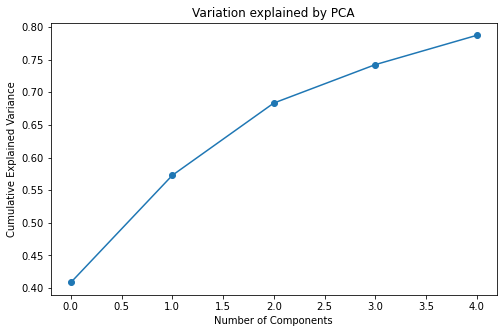

In [380]:
# plot the PCA variation
plt.figure(figsize = (8,5))
plt.plot(np.cumsum(X_train_model.explainedVariance),linestyle='solid', marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Variation explained by PCA')

plt.show()

In [381]:
# get the nonPCA columns
players_train_first = players_train.select(list(set(players_train.columns[:9]) | set(players_train.columns[-5:])))
players_test_first = players_test.select(list(set(players_test.columns[:9]) | set(players_test.columns[-5:])))

In [382]:
# convert the PCA result column into data frame
temp_train = X_train.select('PCA_features').rdd.map(lambda x: [float(i) for i in x['PCA_features']]).toDF(['PCA' + str(i+1) for i in range(params['n_components'])])
temp_test = X_test.select('PCA_features').rdd.map(lambda x: [float(i) for i in x['PCA_features']]).toDF(['PCA' + str(i+1) for i in range(params['n_components'])])

In [383]:
# convert back to pandas
players_train_first_pd = players_train_first.toPandas()
players_test_first_pd = players_test_first.toPandas()
temp_train_pd = temp_train.toPandas()
temp_test_pd = temp_test.toPandas()

In [384]:
# merge the columns together
for c in temp_train_pd.columns:
    players_train_first_pd[c] = temp_train_pd[c]
for c in temp_test_pd.columns:
    players_test_first_pd[c] = temp_test_pd[c]

In [385]:
# convert back to spark df
players_train_final = spark.createDataFrame(players_train_first_pd)
players_test_final = spark.createDataFrame(players_test_first_pd)

## 4.3 Training the Model

In [386]:
from pyspark.ml.classification import DecisionTreeClassifier

In [388]:
# assemble all the X columns into features
assembler = VectorAssembler(inputCols =[i for i in players_train_final.columns] , outputCol='features')

In [389]:
# transform the train and test data
players_train_final = assembler.transform(players_train_final)
players_test_final= assembler.transform(players_test_final)

In [390]:
# rename the column playoff to label
players_train_final = players_train_final.withColumnRenamed('playoff', 'label')
players_test_final= players_test_final.withColumnRenamed('playoff', 'label')

In [391]:
players_train_final.toPandas().shape

(406, 20)

In [392]:
# build the model and make the prediction
clf_dt= DecisionTreeClassifier(featuresCol="features", labelCol="label")
clf_dt = clf_dt.fit(players_train_final)
pred_clf_dt = clf_dt.transform(players_test_final)

## 4.4 Evaluation of the model

In [329]:
# convert the importance into a data frame
importance = pd.DataFrame({'feature': players_test_final.columns, 'importance':clf_dt.featureImportances.toArray()})

In [397]:
# order the data frame by its importance in descending order
print(importance.sort_values('importance', ascending = False).head(10))

   feature  importance
15    PCA3    0.213716
16    PCA4    0.154172
7      age    0.137993
10  weight    0.113176
21    PCA9    0.079174
17    PCA5    0.068354
18    PCA6    0.056910
4   height    0.056822
9     is_C    0.048477
14    PCA2    0.041399


In [331]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# evaluate the model
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction")
accuracy = evaluator.evaluate(pred_clf_dt)
print(accuracy)

0.5301365829350608


In [332]:
from sklearn.metrics import confusion_matrix

In [333]:
y_p=pred_clf_dt.select("prediction").collect()
y =pred_clf_dt.select("label").collect()

cm = confusion_matrix(y, y_p)
tn, fp, fn, tp = cm.ravel()
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[29 26]
 [22 25]]


In [334]:
acc = (tn+tp)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)

In [335]:
import json
# write the metrics into the scores.json file
with open('/project/MSIN0166_Data_Engineering_individual/scores.json', "w") as fd:
    json.dump({"Accuract":acc , 'Precision':precision, 'Recall': recall, 'F1_Score':2*((precision * recall)/(precision + recall))}, fd, indent=4)

# 5.0 Data Transformation

In [76]:
# load the data
teams = spark.read.parquet("/project/MSIN0166_Data_Engineering_individual/parquet_files/team.parquet").toPandas()
players = spark.read.parquet("/project/MSIN0166_Data_Engineering_individual/parquet_files/players.parquet").toPandas()

In [77]:
players

,team,playoff,name,link,No.,pos,height,weight,birth,age,exp,is_eastern,in_2021_22_season,guaranteed,G_2122,GS_2122,MP_2122,FG%_2122,3P%_2122,2P%_2122,eFG%_2122,FT%_2122,ORB_2122,DRB_2122,AST_2122,STL_2122,BLK_2122,TOV_2122,PF_2122,PTS_2122,G_career,GS_career,MP_career,FG%_career,3P%_career,2P%_career,eFG%_career,FT%_career,ORB_career,DRB_career,AST_career,STL_career,BLK_career,TOV_career,PF_career,PTS_career
0,BRK,1,Nic Claxton,/players/c/claxtni01.html,33,C,6.11,215,1999,23,2.0,1,True,1782621,47,19,20.7,0.674,0.000,0.674,0.674,0.581,1.9,3.7,0.9,0.5,1.1,0.8,2.3,8.7,94,20,18.7,0.646,0.167,0.658,0.648,0.539,1.6,3.4,0.9,0.5,1.1,0.7,2.0,7.3
1,BRK,1,Day'Ron Sharpe,/players/s/sharpda01.html,20,PF,6.11,265,2001,21,0.5,1,True,4118400,32,8,12.2,0.577,0.286,0.592,0.584,0.585,2.5,2.5,0.5,0.3,0.5,0.9,1.9,6.2,32,8,12.2,0.577,0.286,0.592,0.584,0.585,2.5,2.5,0.5,0.3,0.5,0.9,1.9,6.2
2,BRK,1,Kyrie Irving,/players/i/irvinky01.html,11,PG,6.20,195,1992,30,10.0,1,True,34916200,29,29,37.6,0.469,0.418,0.501,0.550,0.915,0.6,3.8,5.8,1.4,0.6,2.5,2.8,27.4,611,611,34.0,0.470,0.393,0.505,0.532,0.882,0.8,3.1,5.7,1.3,0.4,2.6,2.3,23.1
3,BRK,1,Andre Drummond,/players/d/drumman01.html,"0, 4",C,6.10,279,1993,29,9.0,1,True,2401537,73,36,19.7,0.570,0.000,0.574,0.570,0.524,3.1,6.2,1.8,1.1,0.9,1.6,2.6,7.9,718,630,29.6,0.540,0.132,0.546,0.541,0.473,4.5,8.7,1.4,1.4,1.5,2.0,3.1,13.8
4,BRK,1,David Duke Jr.,/players/d/dukeda01.html,6,PG,6.50,205,1999,23,0.5,1,True,0,22,7,15.5,0.361,0.243,0.423,0.403,0.810,1.4,1.7,0.8,0.6,0.3,0.4,1.6,4.7,22,7,15.5,0.361,0.243,0.423,0.403,0.810,1.4,1.7,0.8,0.6,0.3,0.4,1.6,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,BRK,1,Cam Thomas,/players/t/thomaca02.html,24,SG,6.40,210,2001,21,0.5,1,True,4174440,67,2,17.6,0.433,0.270,0.520,0.480,0.829,0.2,2.2,1.2,0.5,0.1,0.8,1.0,8.5,67,2,17.6,0.433,0.270,0.520,0.480,0.829,0.2,2.2,1.2,0.5,0.1,0.8,1.0,8.5
504,BRK,1,Blake Griffin,/players/g/griffbl01.html,2,PF,6.90,250,1989,33,11.0,1,True,2641691,56,24,17.1,0.425,0.262,0.565,0.486,0.724,1.1,3.0,1.9,0.5,0.3,0.6,1.7,6.4,724,676,32.9,0.493,0.327,0.521,0.517,0.696,2.0,6.2,4.1,0.8,0.5,2.4,2.7,19.8
505,BRK,1,Kevin Durant,/players/d/duranke01.html,7,PF,6.10,240,1988,34,13.0,1,True,229997220,55,55,37.2,0.518,0.383,0.568,0.570,0.910,0.5,6.9,6.4,0.9,0.9,3.5,2.1,29.9,939,936,36.8,0.496,0.384,0.536,0.546,0.884,0.7,6.4,4.3,1.1,1.1,3.2,1.9,27.2
506,BRK,1,Kessler Edwards,/players/e/edwarke02.html,14,SF,6.80,215,2000,22,0.5,1,True,5318,48,23,20.6,0.412,0.353,0.473,0.502,0.842,0.9,2.7,0.6,0.6,0.5,0.9,1.8,5.9,48,23,20.6,0.412,0.353,0.473,0.502,0.842,0.9,2.7,0.6,0.6,0.5,0.9,1.8,5.9


In [78]:
# get all the team_code and thier conference area
dict_team = {i:j for i,j in zip(players['team'], players['is_eastern'])}

In [79]:
# merge the area information with the team data frame
teams_t = teams.merge(pd.DataFrame({'team':dict_team.keys(), 'is_eastern': dict_team.values()}))

In [80]:
# convert the columns name
teams_t.columns = ['team_code', 'team_name', 'wins', 'loss', 'playoff', 'is_eastern']

In [81]:
teams_t

,team_code,team_name,wins,loss,playoff,is_eastern
0,MIN,Minnesota Timberwolves,46,36,1,0
1,LAC,Los Angeles Clippers,42,40,0,0
2,NOP,New Orleans Pelicans,36,46,1,0
3,SAS,San Antonio Spurs,34,48,0,0
4,LAL,Los Angeles Lakers,33,49,0,0
5,SAC,Sacramento Kings,30,52,0,0
6,POR,Portland Trail Blazers,27,55,0,0
7,OKC,Oklahoma City Thunder,24,58,0,0
8,HOU,Houston Rockets,20,62,0,0
9,CLE,Cleveland Cavaliers,44,38,0,1


In [82]:
# extract the information for players table in the database
players_t = players[['link', 'name', 'team', 'birth', 'age', 'No.', 'pos', 'guaranteed', 'height', 'weight', 'exp']]

In [83]:
# convert the columns name
players_t.columns = ['id', 'name', 'team_code', 'birth_year', 'age', 'number', 'possition', 'guaranteed', 'height', 'weight', 'exp']

In [84]:
players_t

,id,name,team_code,birth_year,age,number,possition,guaranteed,height,weight,exp
0,/players/c/claxtni01.html,Nic Claxton,BRK,1999,23,33,C,1782621,6.11,215,2.0
1,/players/s/sharpda01.html,Day'Ron Sharpe,BRK,2001,21,20,PF,4118400,6.11,265,0.5
2,/players/i/irvinky01.html,Kyrie Irving,BRK,1992,30,11,PG,34916200,6.20,195,10.0
3,/players/d/drumman01.html,Andre Drummond,BRK,1993,29,"0, 4",C,2401537,6.10,279,9.0
4,/players/d/dukeda01.html,David Duke Jr.,BRK,1999,23,6,PG,0,6.50,205,0.5
...,...,...,...,...,...,...,...,...,...,...,...
503,/players/t/thomaca02.html,Cam Thomas,BRK,2001,21,24,SG,4174440,6.40,210,0.5
504,/players/g/griffbl01.html,Blake Griffin,BRK,1989,33,2,PF,2641691,6.90,250,11.0
505,/players/d/duranke01.html,Kevin Durant,BRK,1988,34,7,PF,229997220,6.10,240,13.0
506,/players/e/edwarke02.html,Kessler Edwards,BRK,2000,22,14,SF,5318,6.80,215,0.5


In [85]:
# extract the current season and career results from players
current_season_result = players[['link', 'G_2122', 'GS_2122','MP_2122', 'FG%_2122', '3P%_2122', '2P%_2122', 'eFG%_2122', 'FT%_2122', 'ORB_2122', 'DRB_2122', 'AST_2122', 'STL_2122', 'BLK_2122', 'TOV_2122', 'PF_2122', 'PTS_2122']]
current_career_result = players[['link', 'G_career', 'GS_career','MP_career', 'FG%_career', '3P%_career', '2P%_career', 'eFG%_career', 'FT%_career', 'ORB_career', 'DRB_career', 'AST_career', 'STL_career', 'BLK_career', 'TOV_career', 'PF_career', 'PTS_career']]

In [86]:
# convert the columns name
current_season_result.columns = ['id', 'G', 'GS','MP', 'FGperc', '3Pperc', '2Pperc', 'eFGperc', 'FTperc', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
current_career_result.columns = ['id', 'G', 'GS','MP', 'FGperc', '3Pperc', '2Pperc', 'eFGperc', 'FTperc', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

In [87]:
current_season_result

,id,G,GS,MP,FGperc,3Pperc,2Pperc,eFGperc,FTperc,ORB,DRB,AST,STL,BLK,TOV,PF,PTS
0,/players/c/claxtni01.html,47,19,20.7,0.674,0.000,0.674,0.674,0.581,1.9,3.7,0.9,0.5,1.1,0.8,2.3,8.7
1,/players/s/sharpda01.html,32,8,12.2,0.577,0.286,0.592,0.584,0.585,2.5,2.5,0.5,0.3,0.5,0.9,1.9,6.2
2,/players/i/irvinky01.html,29,29,37.6,0.469,0.418,0.501,0.550,0.915,0.6,3.8,5.8,1.4,0.6,2.5,2.8,27.4
3,/players/d/drumman01.html,73,36,19.7,0.570,0.000,0.574,0.570,0.524,3.1,6.2,1.8,1.1,0.9,1.6,2.6,7.9
4,/players/d/dukeda01.html,22,7,15.5,0.361,0.243,0.423,0.403,0.810,1.4,1.7,0.8,0.6,0.3,0.4,1.6,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,/players/t/thomaca02.html,67,2,17.6,0.433,0.270,0.520,0.480,0.829,0.2,2.2,1.2,0.5,0.1,0.8,1.0,8.5
504,/players/g/griffbl01.html,56,24,17.1,0.425,0.262,0.565,0.486,0.724,1.1,3.0,1.9,0.5,0.3,0.6,1.7,6.4
505,/players/d/duranke01.html,55,55,37.2,0.518,0.383,0.568,0.570,0.910,0.5,6.9,6.4,0.9,0.9,3.5,2.1,29.9
506,/players/e/edwarke02.html,48,23,20.6,0.412,0.353,0.473,0.502,0.842,0.9,2.7,0.6,0.6,0.5,0.9,1.8,5.9


In [88]:
current_career_result

,id,G,GS,MP,FGperc,3Pperc,2Pperc,eFGperc,FTperc,ORB,DRB,AST,STL,BLK,TOV,PF,PTS
0,/players/c/claxtni01.html,94,20,18.7,0.646,0.167,0.658,0.648,0.539,1.6,3.4,0.9,0.5,1.1,0.7,2.0,7.3
1,/players/s/sharpda01.html,32,8,12.2,0.577,0.286,0.592,0.584,0.585,2.5,2.5,0.5,0.3,0.5,0.9,1.9,6.2
2,/players/i/irvinky01.html,611,611,34.0,0.470,0.393,0.505,0.532,0.882,0.8,3.1,5.7,1.3,0.4,2.6,2.3,23.1
3,/players/d/drumman01.html,718,630,29.6,0.540,0.132,0.546,0.541,0.473,4.5,8.7,1.4,1.4,1.5,2.0,3.1,13.8
4,/players/d/dukeda01.html,22,7,15.5,0.361,0.243,0.423,0.403,0.810,1.4,1.7,0.8,0.6,0.3,0.4,1.6,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,/players/t/thomaca02.html,67,2,17.6,0.433,0.270,0.520,0.480,0.829,0.2,2.2,1.2,0.5,0.1,0.8,1.0,8.5
504,/players/g/griffbl01.html,724,676,32.9,0.493,0.327,0.521,0.517,0.696,2.0,6.2,4.1,0.8,0.5,2.4,2.7,19.8
505,/players/d/duranke01.html,939,936,36.8,0.496,0.384,0.536,0.546,0.884,0.7,6.4,4.3,1.1,1.1,3.2,1.9,27.2
506,/players/e/edwarke02.html,48,23,20.6,0.412,0.353,0.473,0.502,0.842,0.9,2.7,0.6,0.6,0.5,0.9,1.8,5.9


In [89]:
# convert all the data frame into spark data frame
teams_t_df = spark.createDataFrame(teams_t)
players_t_df = spark.createDataFrame(players_t)
current_season_result_df = spark.createDataFrame(current_season_result)
current_career_result_df = spark.createDataFrame(current_career_result)

In [90]:
# show the schema of the data frame
teams_t_df.printSchema()
players_t_df.printSchema()
current_season_result_df.printSchema()
current_career_result_df.printSchema()

root
 |-- team_code: string (nullable = true)
 |-- team_name: string (nullable = true)
 |-- wins: long (nullable = true)
 |-- loss: long (nullable = true)
 |-- playoff: long (nullable = true)
 |-- is_eastern: long (nullable = true)

root
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- team_code: string (nullable = true)
 |-- birth_year: long (nullable = true)
 |-- age: long (nullable = true)
 |-- number: string (nullable = true)
 |-- possition: string (nullable = true)
 |-- guaranteed: long (nullable = true)
 |-- height: double (nullable = true)
 |-- weight: long (nullable = true)
 |-- exp: double (nullable = true)

root
 |-- id: string (nullable = true)
 |-- G: long (nullable = true)
 |-- GS: long (nullable = true)
 |-- MP: double (nullable = true)
 |-- FGperc: double (nullable = true)
 |-- 3Pperc: double (nullable = true)
 |-- 2Pperc: double (nullable = true)
 |-- eFGperc: double (nullable = true)
 |-- FTperc: double (nullable = true)
 |-- ORB: double (null

In [91]:
# convert the data frame into parquet format
teams_t_df.write.parquet("/project/MSIN0166_Data_Engineering_individual/parquet_files/teams_t.parquet", mode = 'overwrite')
players_t_df.write.parquet("/project/MSIN0166_Data_Engineering_individual/parquet_files/players_t.parquet", mode = 'overwrite')
current_season_result_df.write.parquet("/project/MSIN0166_Data_Engineering_individual/parquet_files/current_season_result.parquet", mode = 'overwrite')
current_career_result_df.write.parquet("/project/MSIN0166_Data_Engineering_individual/parquet_files/current_career_result_df.parquet", mode = 'overwrite')

# 6.0 Write into database

In [92]:
!PGPASSWORD=qwerty123 psql -h depgdb.crhso94tou3n.eu-west-2.rds.amazonaws.com -d haiyunzou21 -U haiyunzou21 -c '\i /project/MSIN0166_Data_Engineering_individual/NBA.sql'


         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.

psql:/project/MSIN0166_Data_Engineering_individual/NBA.sql:1: NOTICE:  drop cascades to 4 other objects
DETAIL:  drop cascades to table nba.teams
drop cascades to table nba.players
drop cascades to table nba.current_season_result
drop cascades to table nba.current_career_result
DROP SCHEMA
CREATE SCHEMA
psql:/project/MSIN0166_Da

In [93]:
# load the data
teams_t_df = spark.read.parquet("/project/MSIN0166_Data_Engineering_individual/parquet_files/teams_t.parquet")
players_t_df = spark.read.parquet("/project/MSIN0166_Data_Engineering_individual/parquet_files/players_t.parquet")
current_season_result_df = spark.read.parquet("/project/MSIN0166_Data_Engineering_individual/parquet_files/current_season_result.parquet")
current_career_result_df = spark.read.parquet("/project/MSIN0166_Data_Engineering_individual/parquet_files/current_career_result_df.parquet")

In [94]:
# information for log into postgresql
postgres_uri = "jdbc:postgresql://depgdb.crhso94tou3n.eu-west-2.rds.amazonaws.com:5432/haiyunzou21"
user = "haiyunzou21"
password = "qwerty123"

In [95]:
# write the data into the database
teams_t_df.write.jdbc(url=postgres_uri, table="NBA.teams", mode="append", properties={"user":user, "password": password, "driver": "org.postgresql.Driver" })
players_t_df.write.jdbc(url=postgres_uri, table="NBA.players", mode="append", properties={"user":user, "password": password, "driver": "org.postgresql.Driver" })
current_season_result_df.write.jdbc(url=postgres_uri, table="NBA.current_season_result", mode="append", properties={"user":user, "password": password, "driver": "org.postgresql.Driver" })
current_career_result_df.write.jdbc(url=postgres_uri, table="NBA.current_career_result", mode="append", properties={"user":user, "password": password, "driver": "org.postgresql.Driver" })

## 6.1 Querys

# 7.0 Conclusion and limitation